In [59]:
#Description: The purpose of this report is to build a sentiment anlaysis for three specific stocks, SPY, JNJ & TSLA

In [60]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import numpy as np
import re
from textblob import TextBlob
import textblob
import tweepy
import sys
import matplotlib.pyplot as plt


In [61]:
load_dotenv()

True

In [62]:
consumer_key = os.getenv("consumer_key")
consumer_secret = os.getenv("consumer_secret")
Access_Token = os.getenv("Access_Token")
Access_Token_Secret = os.getenv("Access_Token_Secret")

TSLA

In [63]:
auth_handler = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth_handler.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth_handler, wait_on_rate_limit=True)


In [64]:
tsla_serch_term = '#TSLA -filter:retweets'

In [65]:
tweet_amount = 200


In [66]:
tsla_tweets = tweepy.Cursor(api.search, q=tsla_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)


In [67]:
tsla_all_tweets = [tweet.full_text for tweet in tsla_tweets]


In [68]:
#this Data Frame is used to create the
tsla_tweets_df = pd.DataFrame(tsla_all_tweets, columns=['Tweets'])


,Tweets
0,$INR.AX $INR update. Still respecting the arc....
1,$TSLA working it's way into the top 10 most me...
2,i sold the tip now it’s time for round 2 #tsla...
3,@ray4tesla Difficult to tell from on the groun...
4,$TSLA seeing sustained chatter on 4chan over t...
...,...
195,$TSLA seeing sustained chatter on twitch over ...
196,"Once you have a company/business, you have to ..."
197,#TSLA supports at 582.5- 573.6\n levels above ...
198,#Tesla #Stock Forecast (#TSLA)- Broad sideways...


In [69]:
#this formula is used to clean up the tweets; S+ means “a string of non-whitespace characters"

for _, row in tsla_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])



In [70]:
tsla_tweets_df['Polarity'] = tsla_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)


In [71]:
tsla_tweets_df['Result'] = tsla_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [73]:
positive = tsla_tweets_df[tsla_tweets_df.Result == '+'].count()['Tweets']
negative = tsla_tweets_df[tsla_tweets_df.Result == '-'].count()['Tweets']

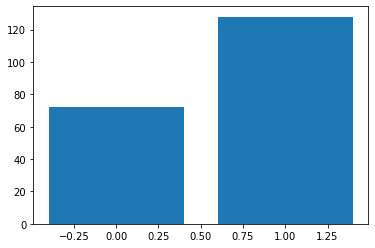

In [74]:
plt.bar([0,1], [positive, negative])

plt.show()


In [ ]:
jnj_serch_term = '#JNJ -filter:retweets'

In [ ]:
jnj_tweets = tweepy.Cursor(api.search, q=jnj_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)

In [ ]:
jnj_all_tweets = [tweet.full_text for tweet in jnj_tweets]


In [ ]:
jnj_tweets_df = pd.DataFrame(jnj_all_tweets, columns=['Tweets'])

In [ ]:
for _, row in jnj_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])

In [ ]:
jnj_tweets_df['Polarity'] = tsla_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)

In [ ]:
tsla_tweets_df['Result'] = tsla_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [ ]:
positive = tsla_tweets_df[tsla_tweets_df.Result == '+'].count()['Tweets']
negative = tsla_tweets_df[tsla_tweets_df.Result == '-'].count()['Tweets']

In [ ]:
plt.bar([0,1], [positive, negative])

plt.show()


In [ ]:
jnj_serch_term = '#JNJ -filter:retweets'

In [ ]:
jnj_tweets = tweepy.Cursor(api.search, q=jnj_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)

In [ ]:
jnj_all_tweets = [tweet.full_text for tweet in jnj_tweets]

In [ ]:
jnj_tweets_df = pd.DataFrame(jnj_all_tweets, columns=['Tweets'])

In [ ]:
for _, row in jnj_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])

In [ ]:
tsla_tweets_df['Polarity'] = tsla_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)

In [ ]:
tsla_tweets_df['Result'] = tsla_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [ ]:
positive = tsla_tweets_df[tsla_tweets_df.Result == '+'].count()['Tweets']
negative = tsla_tweets_df[tsla_tweets_df.Result == '-'].count()['Tweets']

In [ ]:
plt.bar([0,1], [positive, negative])

plt.show()
